In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense , Dropout
from keras.layers import LSTM


In [20]:
df = pd.read_csv('gold_Price.csv')

In [21]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95
...,...,...,...,...,...,...,...
2843,2014-01-06,29119,29300,29395,29051,24380,-0.55
2844,2014-01-04,29279,29279,29279,29279,0,-1.51
2845,2014-01-03,29727,30031,30125,29539,3050,-0.83
2846,2014-01-02,29975,29678,30050,29678,3140,1.47


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2848 non-null   datetime64[ns]
 1   Price   2848 non-null   float64       
 2   Open    2848 non-null   float64       
 3   High    2848 non-null   float64       
 4   Low     2848 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 111.4 KB


In [23]:
df.drop(['Volume', 'Chg%'], axis=1 , inplace=True)

In [24]:
df

,Date,Price,Open,High,Low
0,2025-01-06,77149,77309,77542,76545
1,2025-01-03,76813,77246,78600,76613
2,2025-01-02,76849,76849,76849,76849
3,2025-01-01,76214,76232,76302,76053
4,2024-12-31,76232,75680,76970,75572
...,...,...,...,...,...
2843,2014-01-06,29119,29300,29395,29051
2844,2014-01-04,29279,29279,29279,29279
2845,2014-01-03,29727,30031,30125,29539
2846,2014-01-02,29975,29678,30050,29678


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
numCols = df.columns.drop(['Date'])
df[numCols] = df[numCols].replace({',': ''}, regex=True)
df[numCols] = df[numCols].astype('float64')

In [27]:
df.head()

,Date,Price,Open,High,Low
0,2014-01-01,29542.0,29435.0,29598.0,29340.0
1,2014-01-02,29975.0,29678.0,30050.0,29678.0
2,2014-01-03,29727.0,30031.0,30125.0,29539.0
3,2014-01-04,29279.0,29279.0,29279.0,29279.0
4,2014-01-06,29119.0,29300.0,29395.0,29051.0


In [28]:
df.tail()

,Date,Price,Open,High,Low
2843,2024-12-31,76232.0,75680.0,76970.0,75572.0
2844,2025-01-01,76214.0,76232.0,76302.0,76053.0
2845,2025-01-02,76849.0,76849.0,76849.0,76849.0
2846,2025-01-03,76813.0,77246.0,78600.0,76613.0
2847,2025-01-06,77149.0,77309.0,77542.0,76545.0


In [29]:
df.head(10)

,Date,Price,Open,High,Low
0,2014-01-01,29542.0,29435.0,29598.0,29340.0
1,2014-01-02,29975.0,29678.0,30050.0,29678.0
2,2014-01-03,29727.0,30031.0,30125.0,29539.0
3,2014-01-04,29279.0,29279.0,29279.0,29279.0
4,2014-01-06,29119.0,29300.0,29395.0,29051.0
5,2014-01-07,28959.0,29130.0,29195.0,28912.0
6,2014-01-08,28934.0,28916.0,29029.0,28820.0
7,2014-01-09,28997.0,28990.0,29053.0,28865.0
8,2014-01-10,29169.0,29030.0,29198.0,28960.0
9,2014-01-13,29312.0,29170.0,29330.0,29133.0


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0


In [32]:
fig =  px.line(y = df.Price, x = df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Price',
                  title = {'text': 'Gold Price Data', 'y':0.95,'x':0.5 , 'xanchor': 'center', 'yanchor':'top' },
                  plot_bgcolor = 'rgba(255,223,0,0.9)')
fig.show()

In [33]:
test_size = df[df.Date.dt.year==2024].shape[0]
test_size

257

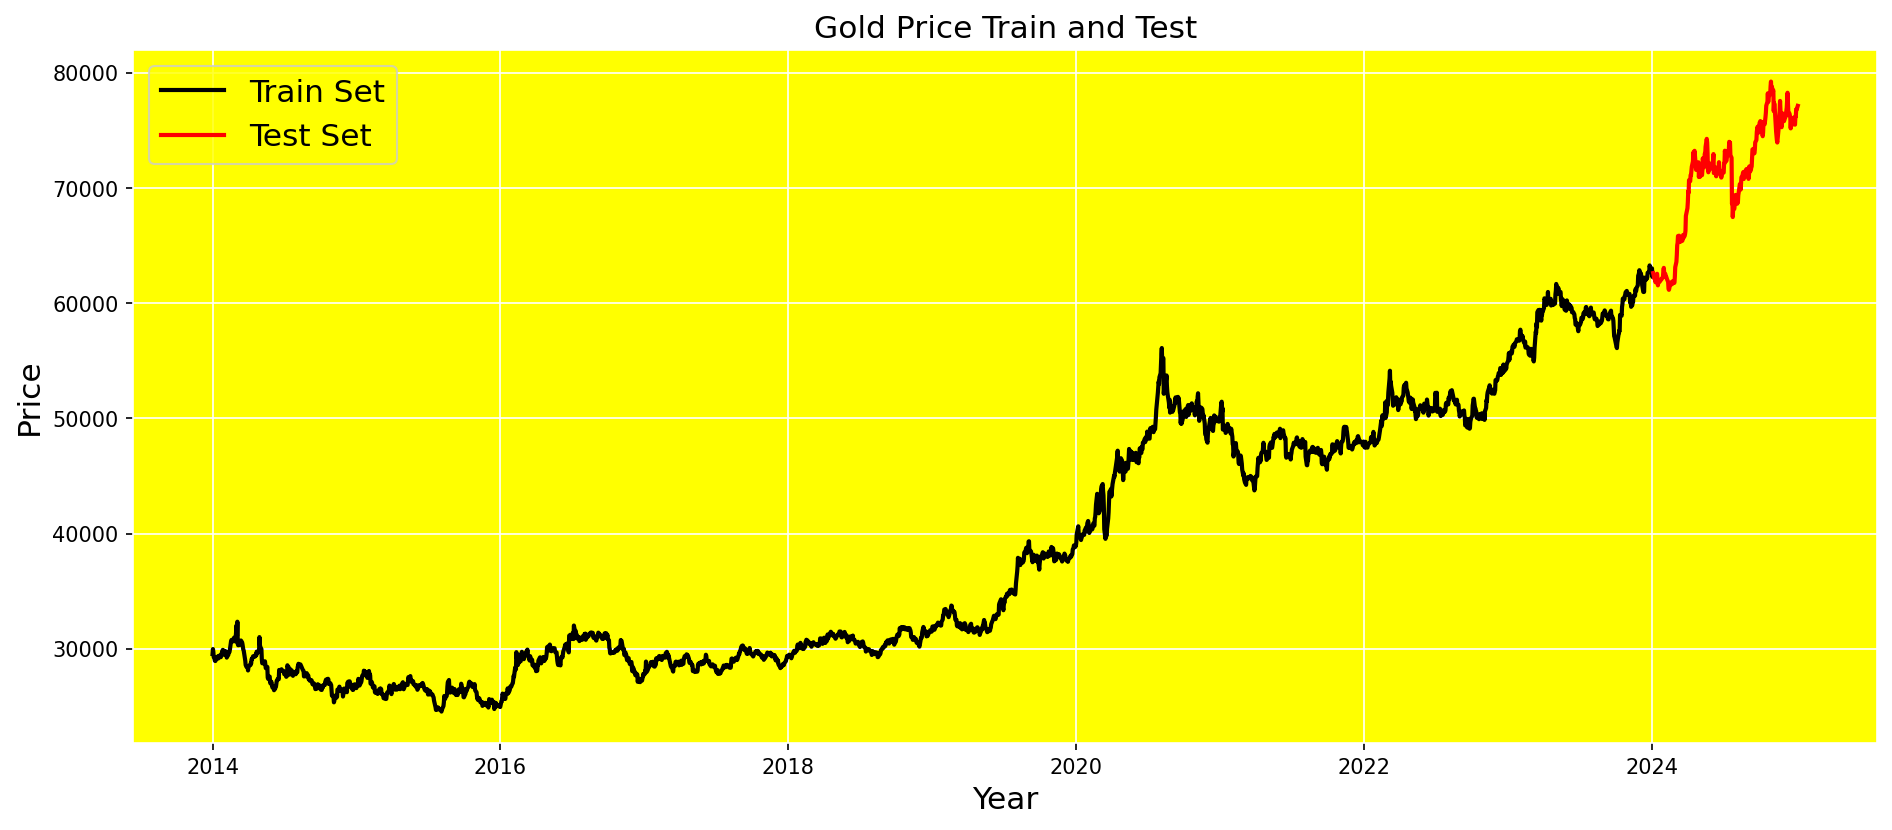

In [34]:
plt.figure(figsize=(15, 6), dpi=150)

plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

# Plot train data
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)

# Plot test data
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='red', lw=2)

plt.title('Gold Price Train and Test', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.legend(['Train Set', 'Test Set'], loc='upper left', prop={'size': 15})

plt.grid(color='white')
plt.show()

In [35]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [36]:
window_size = 60

In [37]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [38]:
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])


In [39]:
test_data = df.Price[-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [40]:
x_test = []
y_test = []

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

Convert data into Numpy Arrays

In [41]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [42]:

# Reshape x_train and x_test to 3D for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Reshape y_train and y_test to 2D (if not already)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [43]:
print('x_train Shape',x_train.shape)
print('y_train Shape',y_train.shape)
print('x_test Shape',x_test.shape)
print('y_test Shape',y_test.shape)

x_train Shape (2531, 60, 1)
y_train Shape (2531, 1)
x_test Shape (257, 60, 1)
y_test Shape (257, 1)


Create LSTM model type of RNN to avoid Gradient Discent Problem


In [44]:
def define_model():
  input1 = Input(shape=(window_size, 1))
  x = LSTM(64, return_sequences=True)(input1)
  x = Dropout(0.2)(x)
  x = LSTM(64, return_sequences=True)(x)
  x = Dropout(0.2)(x)
  x = LSTM(64)(x)
  x = Dropout(0.2)(x)
  x = Dense(32, activation='relu')(x)

  dnn_output = Dense(1)(x)

  model = Model(inputs=input1, outputs=dnn_output)
  model.compile(optimizer='Nadam', loss='mse')
  model.summary()
  return model

In [45]:
model = define_model()
history = model.fit(x_train, y_train, validation_split=0.1 , epochs=150, batch_size=32, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - loss: 0.0136 - val_loss: 5.9618e-04
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 8.4112e-04 - val_loss: 6.5192e-04
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 6.6116e-04 - val_loss: 0.0081
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 5.8575e-04 - val_loss: 0.0042
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - loss: 4.8833e-04 - val_loss: 0.0013
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 5.4091e-04 - val_loss: 0.0019
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 4.9150e-04 - val_loss: 0.0011
Epoch 9/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 4.3007e-04 - val_loss: 0.0122
Epoch 10/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 5.4208e-04 - val_loss: 0.0013
Epoch 11/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 4.2679e-04 - val_loss: 0

In [46]:
result = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0051
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [47]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 1 - MAPE


In [48]:
print('Test Loss:', result)
print('Test MAPE' , MAPE)
print(' Test Accuracy:', accuracy)

Test Loss: 0.00793374516069889
Test MAPE 0.09252790085122216
 Test Accuracy: 0.9074720991487778


In [49]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

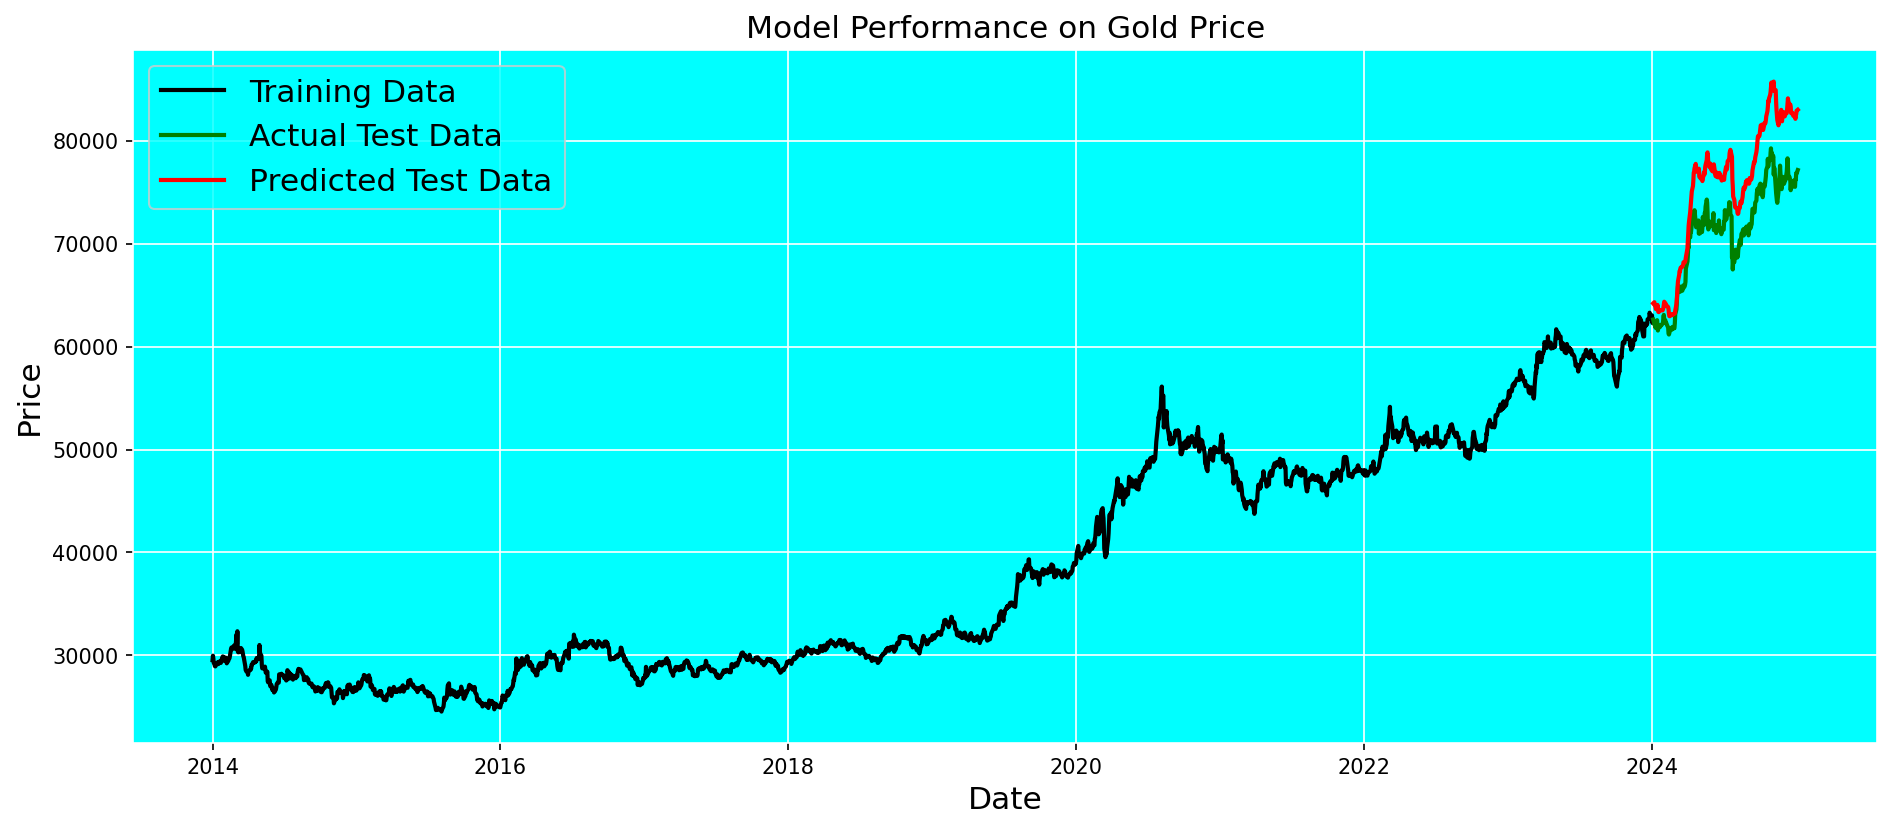

In [50]:
plt.figure(figsize=(15, 6), dpi=150)

plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes', edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='green', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)

plt.title('Model Performance on Gold Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.legend(['Training Data', 'Actual Test Data','Predicted Test Data'], loc='upper left', prop={'size': 15})

plt.grid(color='white')
plt.show()